<a href="https://colab.research.google.com/github/No1377/-/blob/main/%D9%85%D8%AB%D8%A7%D9%84_%DA%AF%D8%B1%D8%A8%D8%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# تعریف کتابخانه های لازم
import pandas as pd
import math
import io
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

In [ ]:
# نرخ تنزیل
def d(i,k):
  return (1/(1+i))**k

In [ ]:
# نرخ بهره
i=0.04

In [ ]:
d(i,1)

0.9615384615384615

In [ ]:
# تعریف احتمال بقا در مدل دموآر

def p(x,k,w):
  return (w-x-k)/(w-x)

In [ ]:
# تعریف احتمال بقا در مدل وانگ
def p_star(x,k,w,landa):
  return float(norm.cdf(norm.ppf(p(x,k,w))- landa))

In [ ]:
# تعریف احتمال فوت در مدل دموآر
def q(x,k,w):
  return(1-p(x,k,w))

In [ ]:
# تعریف احتمال فوت در مدل وانگ
def q_star(x,k,w,landa):
  return(1-p_star(x,k,w,landa))

In [ ]:
# ارزش فعلی مزایا
t=0
for k in range(0,10):
   t+= d(i,k+1) * p(40,k,100) * q(40+k,1,100)

Ax=t
print("Ax is ", t)


Ax is  0.13518159632258392


In [ ]:
# ارزش فعلی حق بیمه
r=0
for k in range(0,10):
   r+= d(i,k) * p(40,k,100)
ax=r
print("ax is ", r)

ax is  7.848054837720509


In [ ]:
# فرمول 1-1-8-2
piA=Ax/ax

print(piA)


0.01722485368894897


In [ ]:
landa=0.1

In [ ]:
# ارزش فعلی مزایا در مدل وانگ
t=0
for k in range(0,10):
   t+= d(i,k+1) * p_star(40,k,100,landa) * q_star(40+k,1,100,landa)
Ax_star=t
print("Ax_star is ", t)

Ax_star is  0.16959937689916418


In [ ]:
# ارزش فعلی حق بیمه در مدل وانگ
r=0
for k in range(0,10):
   r+= d(i,k) * p_star(40,k,100,landa)
ax_star=r
print("ax_star is ", r)

ax_star is  7.736345986649557


In [ ]:
# فرمول 1-1-8-2 در مدل وانگ
pi_star=Ax_star/ax_star
print(pi_star)

0.021922413655211144


In [ ]:
# نسبت حق بیمه در مدل وانگ به حالت عادی
print(pi_star/piA)

1.2727198762376721


In [ ]:
# C=100.000.000  حق بیمه در مدل وانگ و مدل معمولی با مزایای
print(pi_star * 100000000)
print(piA * 100000000)

2192241.3655211143
1722485.368894897


In [ ]:
# تعریف لیست
A=[]
B=[]

In [ ]:
# رسم نمودار برای لانداهای مختلف
for landa in np.arange(-5,15,0.01):
    A.append(landa)
    # ارزش فعلی مزایا
    t=0
    for k in range(0,10):
      t+= d(i,k+1) * p_star(40,k,100,landa) * q_star(40+k,1,100,landa)

    Ax_star=t

    # ارزش فعلی حق بیمه در مدل وانگ
    r=0
    for k in range(0,10):
      r+= d(i,k) * p_star(40,k,100,landa)
    ax_star=r

    # فرمول 1-1-8-2 در مدل وانگ
    pi_star=Ax_star/ax_star

    # حق بیمه
    D_star= pi_star * 100000000
    B.append(D_star)

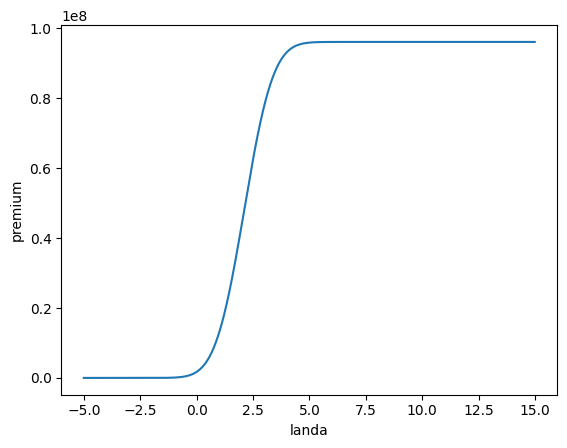

In [ ]:
# رسم نمدوار نتایج فوق
plt.plot(A,B,label="حق بیمه وانگ ")
plt.xlabel("landa")
plt.ylabel("premium")
#plt.savefig("chart.png")
plt.show()
#files.download("chart.png")

In [ ]:
# جست و جوی اولین اندیسی که در آن حق بیمه ها دیگر ثابت هستند
for i in range(len(B)):
  if float(B[i])==float(B[i+1]):
    print(i)
    break
print(A[i])

1496
9.959999999999681


In [ ]:
# حق بیمه با تابع انحراف

In [ ]:
# نرخ تنزیل
def d(i,k):
  return (1/(1+i))**k

In [ ]:
# نرخ بهره
i=0.04

In [ ]:
d(i,1)

0.9615384615384615

In [ ]:
# تعریف احتمال بقا در مدل وانگ
def p_doublestar(x,k,w,c):
  return  (p(x,k,w)) ** c

In [ ]:
# تعریف احتمال فوت در مدل وانگ
def q_doublestar(x,k,w,c):
  return(1-p_doublestar(x,k,w,c))

In [ ]:
c=0.5

In [ ]:
# ارزش فعلی مزایا در مدل وانگ
t=0
for k in range(0,10):
   t+= d(i,k+1) * p_doublestar(40,k,100,c) * q_doublestar(40+k,1,100,c)
Ax_doublestar=t
print("Ax_doublestar is ", t)

Ax_doublestar is  0.07046206916545217


In [ ]:
# ارزش فعلی حق بیمه در مدل وانگ
r=0
for k in range(0,10):
   r+= d(i,k) * p_doublestar(40,k,100,c)
ax_doublestar=r
print("ax_doublestar is ", r)

ax_doublestar is  8.133711048346449


In [ ]:
# فرمول 1-1-8-2 در مدل وانگ
pi_doublestar=Ax_doublestar/ax_doublestar
print(pi_doublestar)

0.00866296684829698


In [ ]:
# C=100.000.000  حق بیمه در مدل وانگ و مدل معمولی با مزایای
print(pi_doublestar * 100000000)
print(piA * 100000000)

866296.6848296981
1722485.368894897


In [ ]:
# تعریف لیست
A=[]
B=[]

In [ ]:
# های مختلف c رسم نمودار برای
for c in np.arange(0,1,0.1):
    A.append(c)
    # ارزش فعلی مزایا در مدل وانگ
    t=0
    for k in range(0,10):
      t+= d(i,k+1) * p_doublestar(40,k,100,c) * q_doublestar(40+k,1,100,c)
    Ax_doublestar=t

    # ارزش فعلی حق بیمه در مدل وانگ
    r=0
    for k in range(0,10):
      r+= d(i,k) * p_doublestar(40,k,100,c)
    ax_doublestar=r

    # فرمول 1-1-8-2 در مدل وانگ
    pi_doublestar=Ax_doublestar/ax_doublestar

    # C=100.000.000 حق بیمه در مدل وانگ  با مزایای

    D_doublestar=pi_doublestar * 100000000
    B.append(D_doublestar)

In [ ]:
print(A)
print(B)

[0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9]
[0.0, 174075.50958198108, 347741.6800773714, 520999.7635476188, 693851.0135041329, 866296.6848296981, 1038338.033699444, 1209976.3175013934, 1381212.7947566162, 1552048.725039034]


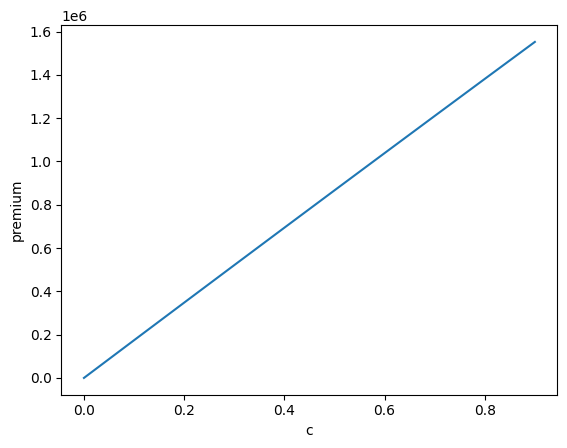

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# رسم نمدوار نتایج فوق
plt.plot(A,B,label="حق بیمه وانگ ")
plt.xlabel("c")
plt.ylabel("premium")
#plt.savefig("chart.png")
plt.show()
#files.download("chart.png")

In [ ]:
# dual power

In [ ]:
# تعریف احتمال بقا در مدل وانگ
def p_triplestar(x,k,w,b):
  return  1-((1-p(x,k,w)) ** b)

In [ ]:
# تعریف احتمال فوت در مدل وانگ
def q_triplestar(x,k,w,b):
  return(1-p_triplestar(x,k,w,b))

In [ ]:
b=1.1

In [ ]:
# ارزش فعلی مزایا در مدل وانگ
t=0
for k in range(0,10):
   t+= d(i,k+1) * p_triplestar(40,k,100,b) * q_triplestar(40+k,1,100,b)
Ax_triplestar=t
print("Ax_triplestar is ", t)

Ax_triplestar is  0.09190154101929893


In [ ]:
# ارزش فعلی حق بیمه در مدل وانگ
r=0
for k in range(0,10):
   r+= d(i,k) * p_triplestar(40,k,100,b)
ax_triplestar=r
print("ax_triplestar is ", r)

ax_triplestar is  7.971805678101701


In [ ]:
# فرمول 1-1-8-2 در مدل وانگ
pi_triplestar=Ax_triplestar/ax_triplestar
print(pi_triplestar)

0.011528321779311502


In [ ]:
# C=100.000.000  حق بیمه در مدل وانگ و مدل معمولی با مزایای
print(pi_triplestar * 100000000)
print(piA * 100000000)

1152832.1779311502
1722485.368894897


In [ ]:
# تعریف لیست
A=[]
B=[]

In [ ]:
# های مختلف c رسم نمودار برای
for b in np.arange(1,4,0.1):
    A.append(b)
    # ارزش فعلی مزایا در مدل وانگ
    t=0
    for k in range(0,10):
      t+= d(i,k+1) * p_triplestar(40,k,100,b) * q_triplestar(40+k,1,100,b)
    Ax_triplestar=t
    # ارزش فعلی حق بیمه در مدل وانگ
    r=0
    for k in range(0,10):
      r+= d(i,k) * p_triplestar(40,k,100,b)
    ax_triplestar=r
    # فرمول 1-1-8-2 در مدل وانگ
    pi_triplestar=Ax_triplestar/ax_triplestar
    # C=100.000.000  حق بیمه در مدل وانگ با مزایای
    C_triplestar=pi_triplestar * 100000000
    B.append(C_triplestar)

In [ ]:
print(A)
print(B)

[1.0, 1.1, 1.2000000000000002, 1.3000000000000003, 1.4000000000000004, 1.5000000000000004, 1.6000000000000005, 1.7000000000000006, 1.8000000000000007, 1.9000000000000008, 2.000000000000001, 2.100000000000001, 2.200000000000001, 2.300000000000001, 2.4000000000000012, 2.5000000000000013, 2.6000000000000014, 2.7000000000000015, 2.8000000000000016, 2.9000000000000017, 3.0000000000000018, 3.100000000000002, 3.200000000000002, 3.300000000000002, 3.400000000000002, 3.500000000000002, 3.6000000000000023, 3.7000000000000024, 3.8000000000000025, 3.9000000000000026]
[1722485.368894897, 1152832.1779311502, 771586.0672381147, 516426.3856302699, 345650.35400381, 231349.98480510735, 154848.0030760468, 103644.31673022317, 69372.83227447921, 46434.18710805949, 31080.734971076487, 20804.16503888774, 13925.649342579985, 9321.533009728118, 6239.739997336935, 4176.893668034079, 2796.0735428728894, 1871.7697933566185, 1253.0411668194117, 838.8564565133609, 561.5904046727261, 375.97735898683914, 251.71780285

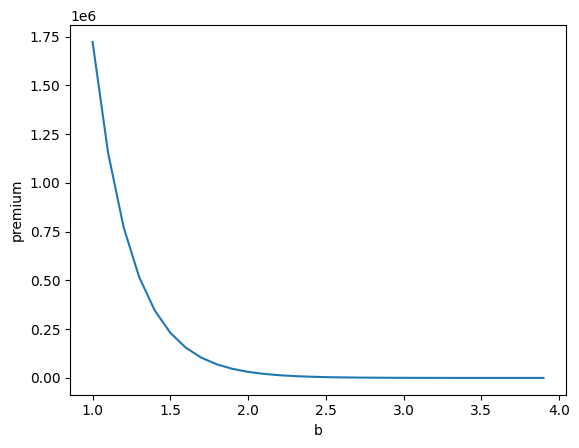

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# رسم نمدوار نتایج فوق
plt.plot(A,B,label="حق بیمه وانگ ")
plt.xlabel("b")
plt.ylabel("premium")
#plt.savefig("chart.png")
plt.show()
#files.download("chart.png")